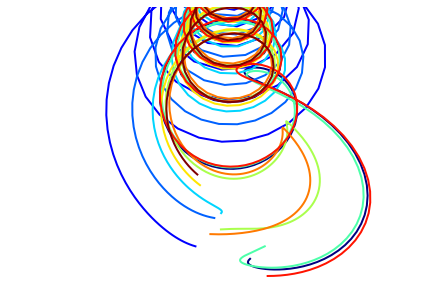

In [8]:
#% matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

def solve_lorenz(N=10,angle=0.0,max_time=4.0,sigma=10.0,beta=8/3,rho=28.0):
    
    fig = plt.figure();
    ax = fig.add_axes([0,0,1,1], projection= '3d');
    ax.axis('off')
    
    #Prepare the axes limits
    ax.set_xlim((-25,25))
    ax.set_ylim((-35,35))
    ax.set_zlim((5,55))
    
    def lorenz_deriv(dxdy_dz,t0,sigma=sigma,beta=beta,rho=rho):
        """Compute the time-derivative of a lorenz system."""
        
        x,y,z = dxdy_dz
        return [sigma*(y-z),x * (rho -z) - y,x * y -beta*z]
    #Choose random starting points, unformly distributed from -15 to 15
    np.random.seed(1)
    
    x0 = -15 + 30*np.random.random((N,3))
    
    #Solve for the trajectories
    t = np.linspace(0,max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv,x0i,t) for x0i in x0])
    
    
    #Choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0,1,N));
    
    for i in range(N):
        x,y,z = x_t[i,:,:].T
        lines = ax.plot(x,y,z,'-', c=colors[i])
        _ = plt.setp(lines,linewidth=2);
    ax.view_init(30,angle)
    _ = plt.show()
    return t,x_t
t,x_t = solve_lorenz(angle=0, N=10)

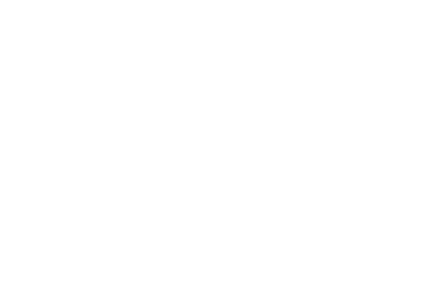

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

{'N': 10,
 'angle': 0.0,
 'max_time': 4.0,
 'sigma': 10.0,
 'beta': 2.6666666666666665,
 'rho': 28.0}

In [9]:
w = interactive(solve_lorenz,angle=(0.,360.), N=(0,50),sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);
t, x_t=w.result
w.kwargs